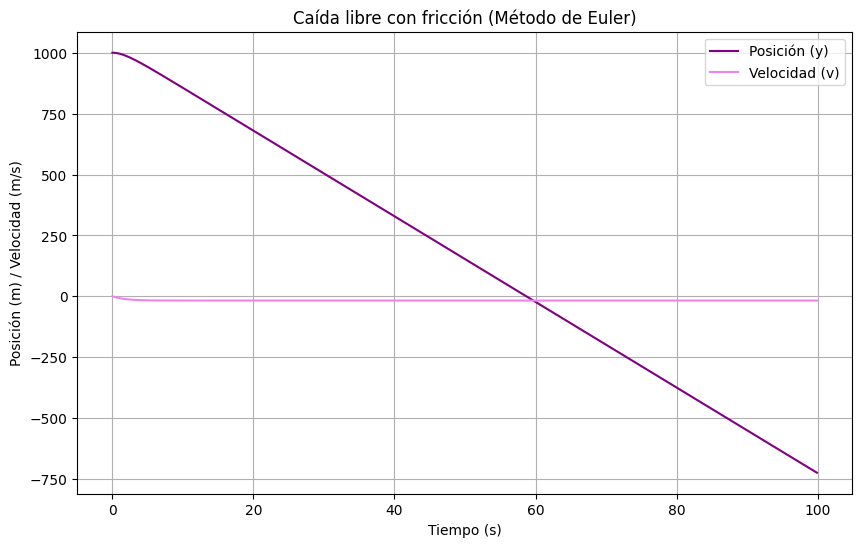

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def x(v0, theta, b, t):
    v0x = v0 * np.cos(theta)
    return (v0x / b) * (1 - np.exp(-b * t))

def y(v0, theta, b, t, g):
    v0y = v0 * np.sin(theta)
    return (1 / b) * ((g / b) + v0y) * (1 - np.exp(-b * t)) - ((g * b) / t)

def funcion(C, m, b, g):
    y, v = C
    dy_dt = v
    dv_dt = -g - (b / m) * v
    return np.array([dy_dt, dv_dt])

# Condiciones iniciales
m = 0.01  # masa
g = 9.8  # gravedad
dt = 0.1  # paso de tiempo
y0 = 1000  # y inicial
v0 = 0  # velocidad inicial
R = 1.70  # radio
eta = 0.000174  # coeficiente de viscosidad del aire
b = 6 * np.pi * R * eta  # coeficiente de fricción

params = (m, b, g)
C1 = np.array([y0, v0])

tiempo = np.arange(0, 100, dt)
N = len(tiempo)

yn = np.zeros(N)
vn = np.zeros(N)

yn[0], vn[0] = C1

# Método de Euler para resolver la ecuación diferencial
for i in range(N - 1):
    dy_dt, dv_dt = funcion([yn[i], vn[i]], *params)
    yn[i + 1] = yn[i] + dt * dy_dt
    vn[i + 1] = vn[i] + dt * dv_dt

# Gráfica de la posición y velocidad
plt.figure(figsize=(10, 6))
plt.plot(tiempo, yn, label="Posición (y)", color="purple")
plt.plot(tiempo, vn, label="Velocidad (v)", color="violet")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m) / Velocidad (m/s)")
plt.title("Caída libre con fricción (Método de Euler)")
plt.legend()
plt.grid(True)
plt.show()